### Capstone Project: Part 3

In this section of my project, I will clean my data and perform featuring engineering. I will also complete Exploratory Data Analysis (EDA) in Python and in Tableau.

I will :
   - Describe my approach to exploratory data analysis
   - Describe my initial results
   - Outline any roadblocks, setbacks, or surprises
   - Perform initial descriptive and visual analysis of my data.
   - Summarize risks and limitations
   - Discuss my proposed next steps
   - Describe how my EDA will inform my modeling decisions
   - Outline three concrete actions I need to take next
   - Visualize EDA - namely Tableau, Matplotlib and Seaborn

### 1. Exploratory Data Analysis (EDA) and Cleaning

I decided to explore each column in turn, assessing the column name, number of nulls (if any) and data type of input values. I also made decisions on how to deal with any null values present depending on their quantity and the data type of the column, and performed some simple visualisations for each column to get a sense of the balance between different variables.

I began by importing and loading my data as a csv file using pandas.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
recidivism = pd.read_csv(
    '/Users/darshanasridhar/Documents/Ga Capstone Datasets /Recidivism/3-Year_Recidivism_for_Offenders_Released_from_Prison_in_Iowa.csv')

In [14]:
recidivism.head(5)

,Fiscal Year Released,Recidivism Reporting Year,Main Supervising District,Release Type,Race - Ethnicity,Age At Release,Sex,Offense Classification,Offense Type,Offense Subtype,Return to Prison,Days to Return,Recidivism Type,New Offense Classification,New Offense Type,New Offense Sub Type,Target Population
0,2010,2013,7JD,Parole,Black - Non-Hispanic,25-34,Male,C Felony,Violent,Robbery,Yes,433.0,New,C Felony,Drug,Trafficking,Yes
1,2010,2013,NaN,Discharged – End of Sentence,White - Non-Hispanic,25-34,Male,D Felony,Property,Theft,Yes,453.0,Tech,NaN,NaN,NaN,No
2,2010,2013,5JD,Parole,White - Non-Hispanic,35-44,Male,B Felony,Drug,Trafficking,Yes,832.0,Tech,NaN,NaN,NaN,Yes
3,2010,2013,6JD,Parole,White - Non-Hispanic,25-34,Male,B Felony,Other,Other Criminal,No,NaN,No Recidivism,NaN,NaN,NaN,Yes
4,2010,2013,NaN,Discharged – End of Sentence,Black - Non-Hispanic,35-44,Male,D Felony,Violent,Assault,Yes,116.0,Tech,NaN,NaN,NaN,No


In [15]:
#Check shape
recidivism.shape

(26020, 17)

We have 26,020 rows (referring to each of 26,020 inmates), and 17 columns.

In [16]:
recidivism.dtypes

Fiscal Year Released            int64
Recidivism Reporting Year       int64
Main Supervising District      object
Release Type                   object
Race - Ethnicity               object
Age At Release                 object
Sex                            object
Offense Classification         object
Offense Type                   object
Offense Subtype                object
Return to Prison               object
Days to Return                float64
Recidivism Type                object
New Offense Classification     object
New Offense Type               object
New Offense Sub Type           object
Target Population              object
dtype: object

Any predictor variables we use must be in float or int (numerical) form in order to apply sklearn models. A number of these columns that I am considering using as features are objects - these must be dealt with as part of cleaning (for example, by dummifying or ranking).

In [17]:
recidivism.describe()

,Fiscal Year Released,Recidivism Reporting Year,Days to Return
count,26020.000000,26020.000000,8681.000000
mean,2012.600769,2015.600769,469.931460
std,1.661028,1.661028,282.303352
min,2010.000000,2013.000000,0.000000
25%,2011.000000,2014.000000,238.000000
50%,2013.000000,2016.000000,418.000000
75%,2014.000000,2017.000000,682.000000
max,2015.000000,2018.000000,1095.000000


In [18]:
recidivism.columns

Index(['Fiscal Year Released', 'Recidivism Reporting Year',
       'Main Supervising District', 'Release Type', 'Race - Ethnicity',
       'Age At Release ', 'Sex', 'Offense Classification', 'Offense Type',
       'Offense Subtype', 'Return to Prison', 'Days to Return',
       'Recidivism Type', 'New Offense Classification', 'New Offense Type',
       'New Offense Sub Type', 'Target Population'],
      dtype='object')

I want to explore each of these columns in turn to check the information they contain, check for nulls, and see if they will actually be useful to model. 

I started by writing a line of code to check which columns contain nulls, if any:

In [19]:
#Check for nulls
null = [col for col in recidivism.columns if recidivism[col].isnull().any()]
recidivism[null].isnull().sum()

Main Supervising District      9581
Release Type                   1762
Race - Ethnicity                 30
Age At Release                    3
Sex                               3
Days to Return                17339
New Offense Classification    19302
New Offense Type              19302
New Offense Sub Type          19321
dtype: int64

Some of these columns have over 70% nulls - the general rule I will be following moving forward is to consider dropping any columns with over 70% nulls as these provided limited information about the variable.

In [20]:
sex_grouped = recidivism.groupby(['Sex'])

In [21]:
sex_grouped.corr()

Fiscal Year Released  \
Sex                                                      
Female Fiscal Year Released                   1.000000   
       Recidivism Reporting Year              1.000000   
       Days to Return                        -0.047497   
Male   Fiscal Year Released                   1.000000   
       Recidivism Reporting Year              1.000000   
       Days to Return                        -0.014833   

                                  Recidivism Reporting Year  Days to Return  
Sex                                                                          
Female Fiscal Year Released                        1.000000       -0.047497  
       Recidivism Reporting Year                   1.000000       -0.047497  
       Days to Return                             -0.047497        1.000000  
Male   Fiscal Year Released                        1.000000       -0.014833  
       Recidivism Reporting Year                   1.000000       -0.014833  
       Days to Return                             -0.014833        1.000000

**1. Fiscal Year Released**

This column contains data in the form of integers, detailing the fiscal year (year ending June 30) that the inmate was initially released from this prison, between the years 2010 and 2015. This marks the beginning of the recidivism tracking period and will be interesting to include in modelling - there are also no null values here, so I will leave this column in for now. However I will change the name of this column to make it easier and quicker to refer to.

In [11]:
print('Number of null values in', recidivism[['Fiscal Year Released']].isnull().sum())
print('Data type of', recidivism[['Fiscal Year Released']].dtypes)

Number of null values in Fiscal Year Released    0
dtype: int64
Data type of Fiscal Year Released    int64
dtype: object


In [12]:
recidivism[['Fiscal Year Released']].min()

Fiscal Year Released    2010
dtype: int64

In [13]:
recidivism[['Fiscal Year Released']].max()

Fiscal Year Released    2015
dtype: int64

In [14]:
recidivism.rename(columns={'Fiscal Year Released': 'Year Released' }, inplace=True)

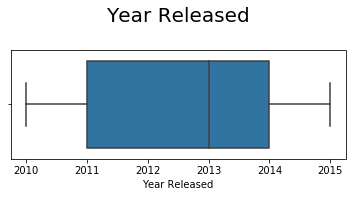

In [15]:
fig, ax = plt.subplots(figsize=(6, 2))
sns.boxplot('Year Released', data=recidivism , orient='h', ax=ax)
ax.set_title('Year Released\n', fontsize=20)
plt.show()


**2. Recidivism Reporting Year**

This column contains data in the form of integers, giving the fiscal year (year ending June 30) marking the end of the three year tracking period, between the years 2013 and 2018. There are no null values here, so I will leave this column in for now. However I will change the name of this column to make it easier to refer to.

In [16]:
print('Number of null values in', recidivism[['Recidivism Reporting Year']].isnull().sum())
print('Data type of', recidivism[['Recidivism Reporting Year']].dtypes)

Number of null values in Recidivism Reporting Year    0
dtype: int64
Data type of Recidivism Reporting Year    int64
dtype: object


In [17]:
recidivism[['Recidivism Reporting Year']].min()

Recidivism Reporting Year    2013
dtype: int64

In [18]:
recidivism[['Recidivism Reporting Year']].max()

Recidivism Reporting Year    2018
dtype: int64

In [19]:
recidivism.rename(columns={'Recidivism Reporting Year': 'Tracking End' }, inplace=True)

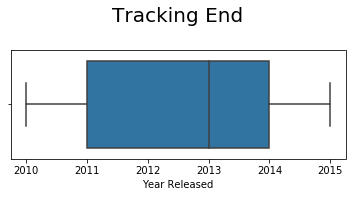

In [20]:
fig, ax = plt.subplots(figsize=(6, 2))
sns.boxplot('Year Released', data=recidivism , orient='h', ax=ax)
ax.set_title('Tracking End\n', fontsize=20)
plt.show()

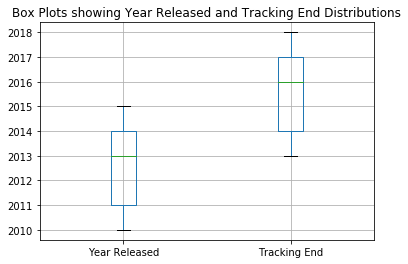

In [21]:
recidivism.boxplot(['Year Released', 'Tracking End'])
plt.title('Box Plots showing Year Released and Tracking End Distributions');

**3. Main Supervising District**

This column contains data as objects (strings), containing the district code for the  Judicial District supervising the offender for the longest time during the tracking period. 
There are over 9,500 nulls in this column but I will fill these with 'None Given' as this column contains strings, and dummify. 

In [22]:
print('Number of null values in', recidivism[['Main Supervising District']].isnull().sum())
print('Data type of', recidivism[['Main Supervising District']].dtypes)

Number of null values in Main Supervising District    9581
dtype: int64
Data type of Main Supervising District    object
dtype: object


In [23]:
recidivism['Main Supervising District'] = recidivism['Main Supervising District'].fillna('None Given')

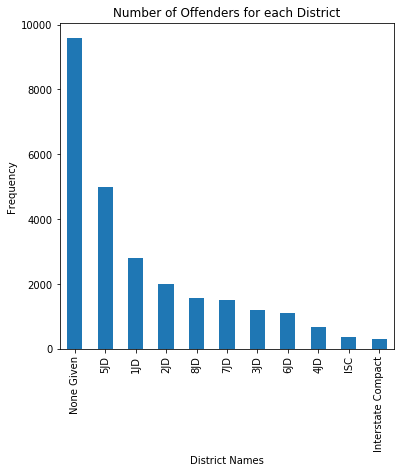

In [24]:
ax = recidivism['Main Supervising District'].value_counts().plot(kind='bar',
                                    figsize=(6,6),
                                    title="Number of Offenders for each District")
ax.set_xlabel("District Names");
ax.set_ylabel("Frequency");

In [25]:
recidivism.rename(columns={'Main Supervising District': 'District' }, inplace=True)

In [26]:
recidivism = pd.get_dummies(recidivism, columns=['District'], drop_first=True)

**4. Release Type**

This column contains data as objects (strings), giving the reasoning for Offender's release from prison.
There are over 1,700 nulls here, but these could be replaced (filled) with 'None Given' as no reason has been specified here.

For the sake of modelling, I will be grouping the different release types into 4 general categories:
1. Parole (including the terms Parole, Parole Granted, Paroled to Detainer - Out of State, Paroled to Detainer - INS, Paroled to Detained - U.S. Marshall, Paroled to Detainer - Iowa, Interstate Compact Parole)
2. Discharged (including the terms Discharged - End of Sentence, Discharged - Expiration of Sentence, Paroled w/Immediate Discharge)
3. Special Sentence (Released to Special Sentence, Special Sentence)
4. None Given

In [27]:
print('Number of null values in', recidivism[['Release Type']].isnull().sum())
print('Data type of', recidivism[['Release Type']].dtypes)

Number of null values in Release Type    1762
dtype: int64
Data type of Release Type    object
dtype: object


In [28]:
recidivism['Release Type'] = recidivism['Release Type'].fillna('None Given')

In [29]:
recidivism['Release Type'].value_counts()

Parole                                 9810
Parole Granted                         5577
Discharged – End of Sentence           5039
Discharged - Expiration of Sentence    2335
None Given                             1762
Released to Special Sentence            401
Special Sentence                        347
Paroled w/Immediate Discharge           334
Paroled to Detainer - Out of State      137
Paroled to Detainer - INS               134
Paroled to Detainer - U.S. Marshall      77
Paroled to Detainer - Iowa               66
Interstate Compact Parole                 1
Name: Release Type, dtype: int64

In [30]:
recidivism['Release Type'] = recidivism['Release Type'].replace('Parole Granted', 'Parole')
recidivism['Release Type'] = recidivism['Release Type'].replace('Paroled to Detainer - Out of State', 'Parole')
recidivism['Release Type'] = recidivism['Release Type'].replace('Paroled to Detainer - INS', 'Parole')
recidivism['Release Type'] = recidivism['Release Type'].replace('Paroled to Detainer - U.S. Marshall', 'Parole')
recidivism['Release Type'] = recidivism['Release Type'].replace('Paroled to Detainer - Iowa', 'Parole')
recidivism['Release Type'] = recidivism['Release Type'].replace('Interstate Compact Parole', 'Parole')

recidivism['Release Type'] = recidivism['Release Type'].replace('Discharged – End of Sentence', 'Discharged')
recidivism['Release Type'] = recidivism['Release Type'].replace('Discharged - Expiration of Sentence', 'Discharged')
recidivism['Release Type'] = recidivism['Release Type'].replace('Paroled w/Immediate Discharge', 'Discharged')

recidivism['Release Type'] = recidivism['Release Type'].replace('Released to Special Sentence', 'Special Sentence')

In [31]:
recidivism['Release Type'].value_counts()

Parole              15802
Discharged           7708
None Given           1762
Special Sentence      748
Name: Release Type, dtype: int64

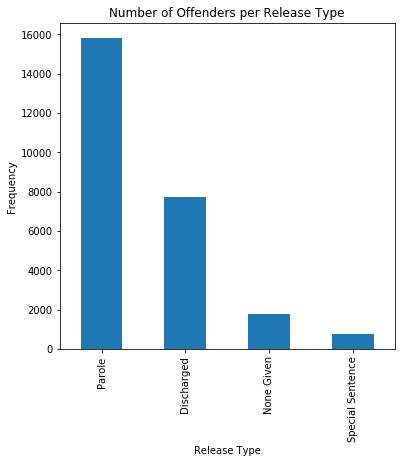

In [32]:
ax = recidivism['Release Type'].value_counts().plot(kind='bar',
                                    figsize=(6,6),
                                    title="Number of Offenders per Release Type")
ax.set_xlabel("Release Type");
ax.set_ylabel("Frequency");

In [33]:
recidivism['Release Type'].value_counts(normalize=True)

Parole              0.607302
Discharged          0.296234
None Given          0.067717
Special Sentence    0.028747
Name: Release Type, dtype: float64

In [34]:
recidivism = pd.get_dummies(recidivism, columns=['Release Type'], drop_first=True)

**5. Race - Ethnicity**

This column describes both the offender's Race and Ethnicity as an object (string).
Race and ethnicity can be set as two different fields here - I want to separate out race into one column and ethnicity into another.

In [35]:
print('Number of null values in', recidivism[['Race - Ethnicity']].isnull().sum())
print('Data type of', recidivism[['Race - Ethnicity']].dtypes)

Number of null values in Race - Ethnicity    30
dtype: int64
Data type of Race - Ethnicity    object
dtype: object


In [36]:
recidivism['Race - Ethnicity'] = recidivism['Race - Ethnicity'].fillna('None Given')

In [37]:
recidivism['Race - Ethnicity'].value_counts()

White - Non-Hispanic                               17584
Black - Non-Hispanic                                6109
White - Hispanic                                    1522
American Indian or Alaska Native - Non-Hispanic      502
Asian or Pacific Islander - Non-Hispanic             192
Black - Hispanic                                      37
None Given                                            30
American Indian or Alaska Native - Hispanic           20
White -                                               12
Asian or Pacific Islander - Hispanic                   5
N/A -                                                  5
Black -                                                2
Name: Race - Ethnicity, dtype: int64

In [38]:
recidivism['Race - Ethnicity'] = recidivism['Race - Ethnicity'].replace('White -', 'White')
recidivism['Race - Ethnicity'] = recidivism['Race - Ethnicity'].replace('N/A -', 'None Given')
recidivism['Race - Ethnicity'] = recidivism['Race - Ethnicity'].replace('Black -', 'Black')

In [39]:
recidivism['Race - Ethnicity'].value_counts()

White - Non-Hispanic                               17584
Black - Non-Hispanic                                6109
White - Hispanic                                    1522
American Indian or Alaska Native - Non-Hispanic      502
Asian or Pacific Islander - Non-Hispanic             192
Black - Hispanic                                      37
None Given                                            35
American Indian or Alaska Native - Hispanic           20
White                                                 12
Asian or Pacific Islander - Hispanic                   5
Black                                                  2
Name: Race - Ethnicity, dtype: int64

In [40]:
recidivism[['Race', 'Ethnicity']] = recidivism['Race - Ethnicity'].str.split(' - ', expand = True)

In [41]:
recidivism.Race.isnull().sum()

0

In [42]:
recidivism.Ethnicity.isnull().sum()

49

In [43]:
recidivism['Ethnicity'] = recidivism['Ethnicity'].fillna('None Given')

In [44]:
recidivism.Ethnicity.isnull().sum()

0

In [45]:
recidivism.Race.value_counts()

White                               19118
Black                                6148
American Indian or Alaska Native      522
Asian or Pacific Islander             197
None Given                             35
Name: Race, dtype: int64

In [46]:
recidivism.Ethnicity.value_counts()

Non-Hispanic    24387
Hispanic         1584
None Given         49
Name: Ethnicity, dtype: int64

In [47]:
recidivism.head(2)

,Year Released,Tracking End,Race - Ethnicity,Age At Release,Sex,Offense Classification,Offense Type,Offense Subtype,Return to Prison,Days to Return,...,District_7JD,District_8JD,District_ISC,District_Interstate Compact,District_None Given,Release Type_None Given,Release Type_Parole,Release Type_Special Sentence,Race,Ethnicity
0,2010,2013,Black - Non-Hispanic,25-34,Male,C Felony,Violent,Robbery,Yes,433.0,...,1,0,0,0,0,0,1,0,Black,Non-Hispanic
1,2010,2013,White - Non-Hispanic,25-34,Male,D Felony,Property,Theft,Yes,453.0,...,0,0,0,0,1,0,0,0,White,Non-Hispanic


In [48]:
recidivism.drop('Race - Ethnicity', axis=1, inplace=True)

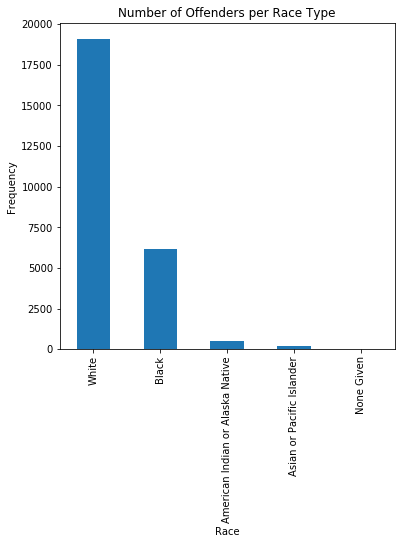

In [49]:
ax = recidivism['Race'].value_counts().plot(kind='bar',
                                    figsize=(6,6),
                                    title="Number of Offenders per Race Type")
ax.set_xlabel("Race");
ax.set_ylabel("Frequency");

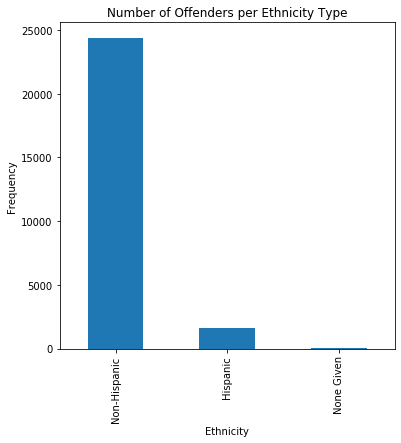

In [50]:
ax = recidivism['Ethnicity'].value_counts().plot(kind='bar',
                                    figsize=(6,6),
                                    title="Number of Offenders per Ethnicity Type")
ax.set_xlabel("Ethnicity");
ax.set_ylabel("Frequency");

In [51]:
recidivism = pd.get_dummies(recidivism, columns=['Ethnicity'], drop_first=True)

In [52]:
recidivism = pd.get_dummies(recidivism, columns=['Race'], drop_first=True)

**6. Age At Release**

This column details the offender's age group at release from prison.
For the sake of modelling, this needs to be an integer or a float, not a range object. I therefore replaced the Under 25 category with just 25, the 55 and Older category with 55, and wrote a function to turn each range stated into the mean of that range.
There were only 3 nulls in this column which I tried to drop but for some reason it wouldn't let me - 

In [53]:
print('Number of null values in', recidivism[['Age At Release ']].isnull().sum())
print('Data type of', recidivism[['Age At Release ']].dtypes)

Number of null values in Age At Release     3
dtype: int64
Data type of Age At Release     object
dtype: object


In [54]:
recidivism['Age At Release '].value_counts()

25-34           9554
35-44           6223
Under 25        4590
45-54           4347
55 and Older    1303
Name: Age At Release , dtype: int64

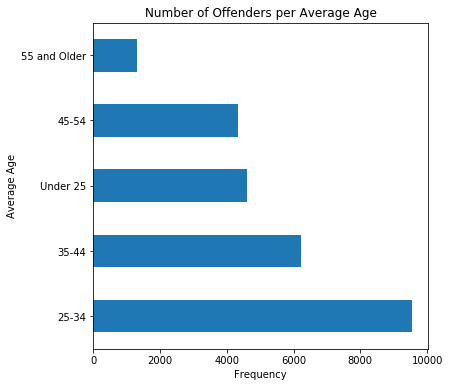

In [55]:
ax = recidivism['Age At Release '].value_counts().plot(kind='barh', 
                                    figsize=(6,6),
                                    title="Number of Offenders per Average Age")
ax.set_xlabel("Frequency");
ax.set_ylabel("Average Age");

In [56]:
recidivism['Age At Release '] = recidivism['Age At Release '].replace('Under 25', 25)
recidivism['Age At Release '] = recidivism['Age At Release '].replace('55 and Older', 55)

In [57]:
def string_splitter(x):
    try:
        split = x.split('-') #This splits the string wherever '-' exists into a list containing 2 values - lower and upper
        lower = float(split[0]) #this is the first term that appears in a range
        upper = float(split[1]) #This is the second term that appears in a range
        return (lower + upper)/2 #function returns the average of these two terms
    except:
        return float(x) #if isn't entered as a range, simply return the string as a float
    
    if  recidivism['Age At Release '] == 'Under 25':
        return float(25)
    else:
        return float(55)
    
recidivism['Age At Release '] = recidivism['Age At Release '].map(string_splitter)

In [58]:
recidivism['Age At Release '].dtype

dtype('float64')

In [59]:
recidivism['Age At Release '].isnull().sum()

3

In [60]:
recidivism['Age At Release '].dropna(inplace= True)

In [61]:
recidivism['Age At Release '].isnull().sum()

0

In [62]:
recidivism.rename(columns={'Age At Release ': 'Average Release Age'}, inplace=True)

In [63]:
recidivism

,Year Released,Tracking End,Average Release Age,Sex,Offense Classification,Offense Type,Offense Subtype,Return to Prison,Days to Return,Recidivism Type,...,District_None Given,Release Type_None Given,Release Type_Parole,Release Type_Special Sentence,Ethnicity_Non-Hispanic,Ethnicity_None Given,Race_Asian or Pacific Islander,Race_Black,Race_None Given,Race_White
0,2010,2013,29.5,Male,C Felony,Violent,Robbery,Yes,433.0,New,...,0,0,1,0,1,0,0,1,0,0
1,2010,2013,29.5,Male,D Felony,Property,Theft,Yes,453.0,Tech,...,1,0,0,0,1,0,0,0,0,1
2,2010,2013,39.5,Male,B Felony,Drug,Trafficking,Yes,832.0,Tech,...,0,0,1,0,1,0,0,0,0,1
3,2010,2013,29.5,Male,B Felony,Other,Other Criminal,No,NaN,No Recidivism,...,0,0,1,0,1,0,0,0,0,1
4,2010,2013,39.5,Male,D Felony,Violent,Assault,Yes,116.0,Tech,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26015,2015,2018,25.0,Male,C Felony,Violent,Assault,No,NaN,No Recidivism,...,1,0,1,0,0,0,0,0,0,1
26016,2015,2018,39.5,Male,C Felony,Violent,Sex,No,NaN,No Recidivism,...,0,0,0,1,1,0,0,0,0,1
26017,2015,2018,29.5,Female,Aggravated Misdemeanor,Public Order,Traffic,No,NaN,No Recidivism,...,0,0,1,0,1,0,0,0,0,1
26018,2015,2018,29.5,Male,D Felony,Property,Theft,No,NaN,No Recidivism,...,0,0,0,0,1,0,0,0,0,1


In [64]:
recidivism['Average Release Age'].value_counts()

29.5    9554
39.5    6223
25.0    4590
49.5    4347
55.0    1303
Name: Average Release Age, dtype: int64

In [65]:
recidivism['Average Release Age'].isnull().sum()

3

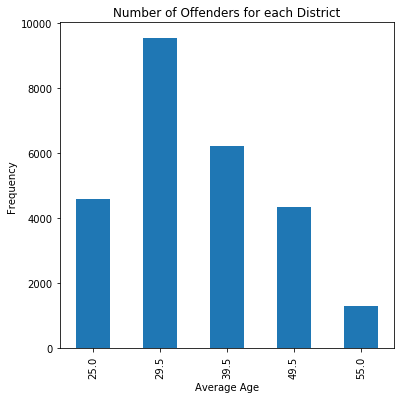

In [66]:
ax = recidivism['Average Release Age'].value_counts().sort_index().plot(kind='bar',
                                    figsize=(6,6),
                                    title="Number of Offenders for each District")
ax.set_xlabel("Average Age");
ax.set_ylabel("Frequency");

**7. Sex**

This column gives the gender of each offender, whether Male or Female. I will be dummifying this for the sake of modelling.
There are 3 null values here, which I will be removing.

In [67]:
print('Number of null values in', recidivism[['Sex']].isnull().sum())
print('Data type of', recidivism[['Sex']].dtypes)

Number of null values in Sex    3
dtype: int64
Data type of Sex    object
dtype: object


In [68]:
recidivism['Sex'].value_counts()

Male      22678
Female     3339
Name: Sex, dtype: int64

In [69]:
recidivism['Sex'].dropna(inplace=True)

In [70]:
recidivism.shape

(26020, 33)

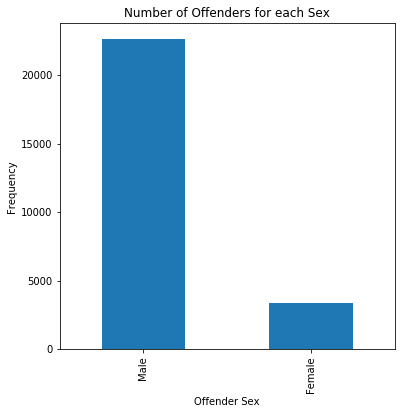

In [71]:
ax = recidivism['Sex'].value_counts().plot(kind='bar',
                                    figsize=(6,6),
                                    title="Number of Offenders for each Sex")
ax.set_xlabel("Offender Sex");
ax.set_ylabel("Frequency");

In [72]:
recidivism = pd.get_dummies(recidivism, columns=['Sex'], drop_first=True)

In [73]:
recidivism

,Year Released,Tracking End,Average Release Age,Offense Classification,Offense Type,Offense Subtype,Return to Prison,Days to Return,Recidivism Type,New Offense Classification,...,Release Type_None Given,Release Type_Parole,Release Type_Special Sentence,Ethnicity_Non-Hispanic,Ethnicity_None Given,Race_Asian or Pacific Islander,Race_Black,Race_None Given,Race_White,Sex_Male
0,2010,2013,29.5,C Felony,Violent,Robbery,Yes,433.0,New,C Felony,...,0,1,0,1,0,0,1,0,0,1
1,2010,2013,29.5,D Felony,Property,Theft,Yes,453.0,Tech,NaN,...,0,0,0,1,0,0,0,0,1,1
2,2010,2013,39.5,B Felony,Drug,Trafficking,Yes,832.0,Tech,NaN,...,0,1,0,1,0,0,0,0,1,1
3,2010,2013,29.5,B Felony,Other,Other Criminal,No,NaN,No Recidivism,NaN,...,0,1,0,1,0,0,0,0,1,1
4,2010,2013,39.5,D Felony,Violent,Assault,Yes,116.0,Tech,NaN,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26015,2015,2018,25.0,C Felony,Violent,Assault,No,NaN,No Recidivism,NaN,...,0,1,0,0,0,0,0,0,1,1
26016,2015,2018,39.5,C Felony,Violent,Sex,No,NaN,No Recidivism,NaN,...,0,0,1,1,0,0,0,0,1,1
26017,2015,2018,29.5,Aggravated Misdemeanor,Public Order,Traffic,No,NaN,No Recidivism,NaN,...,0,1,0,1,0,0,0,0,1,0
26018,2015,2018,29.5,D Felony,Property,Theft,No,NaN,No Recidivism,NaN,...,0,0,0,1,0,0,0,0,1,1


**8. Offense Classification**

This column gives the offense classification assigned to each offender, in the form of maximum penalty :

- A Felony = Life
- B Felony = 25 or 50 years
- C Felony = 10 years
- D Felony = 5 years
- Aggravated Misdemeanor = 2 years
- Serious Misdemeanor = 1 year
- Simple Misdemeanor = 30 days

For the sake of modelling, it could be useful to rank these from lowest penalty to highest, where:

- 1 refers to Simple Misdemeanor = 30 days
- 2 refers to Serious Misdemeanor = 1 year
- 3 refers to Aggravated Misdemeanor = 2 years
- 4 refers to D Felony = 5 years
- 5 refers to C Felony = 10 years
- 6 refers to B Felony = 25 or 50 years
- 7 refers to A Felony = Life

However there are other values in this column which are not explicity the same as one of these 7 categories. I will therefore be combining in the following format:

- 1 (including Simple Misdemeanor, Other Misdemeanor
- 2 (including Serious Misdemeanor, 
- 3 (including Aggravated Misdemeanor, 
- 4 (including Felony - Enhancement to Original Penalty, Felony - Enhanced, Other Felony, Other Felony (Old Code),  Felony - Mandatory Minumum, Sexual Predator Community Supervision)
- 5 (including D Felony)
- 6 (including C Felony, Special Sentence 2005)  
- 7 (including B Felony)
- 8 (including A Felony)

There are no null values in this column.

In [74]:
print('Number of null values in', recidivism[['Offense Classification']].isnull().sum())
print('Data type of', recidivism[['Offense Classification']].dtypes)

Number of null values in Offense Classification    0
dtype: int64
Data type of Offense Classification    object
dtype: object


In [75]:
recidivism['Offense Classification'].value_counts()
#it might be useful to rank these 

D Felony                                    10487
C Felony                                     6803
Aggravated Misdemeanor                       4930
B Felony                                     1765
Felony - Enhancement to Original Penalty     1533
Felony - Enhanced                             220
Serious Misdemeanor                           155
Special Sentence 2005                          98
Felony - Mandatory Minimum                     11
Other Felony                                    6
A Felony                                        4
Simple Misdemeanor                              3
Other Felony (Old Code)                         2
Sexual Predator Community Supervision           2
Other Misdemeanor                               1
Name: Offense Classification, dtype: int64

In [76]:
recidivism['Offense Classification'] = recidivism['Offense Classification'].replace('Other Misdemeanor', 'Simple Misdemeanor')

recidivism['Offense Classification'] = recidivism['Offense Classification'].replace('Felony - Enhancement to Original Penalty', 'Other Felony')
recidivism['Offense Classification'] = recidivism['Offense Classification'].replace('Felony - Enhanced', 'Other Felony')
recidivism['Offense Classification'] = recidivism['Offense Classification'].replace('Other Felony (Old Code)', 'Other Felony')
recidivism['Offense Classification'] = recidivism['Offense Classification'].replace('Felony - Mandatory Minimum', 'Other Felony')
recidivism['Offense Classification'] = recidivism['Offense Classification'].replace('Sexual Predator Community Supervision', 'Other Felony')

recidivism['Offense Classification'] = recidivism['Offense Classification'].replace('Special Sentence 2005', 'C Felony')

In [77]:
recidivism['Offense Classification'].value_counts()

D Felony                  10487
C Felony                   6901
Aggravated Misdemeanor     4930
Other Felony               1774
B Felony                   1765
Serious Misdemeanor         155
A Felony                      4
Simple Misdemeanor            4
Name: Offense Classification, dtype: int64

In [78]:
recidivism['Offense Classification'] = recidivism['Offense Classification'].map({'Simple Misdemeanor': 1,
                                                             'Serious Misdemeanor': 2, 
                                                             'Aggravated Misdemeanor': 3, 
                                                             'Other Felony': 4,
                                                             'D Felony':5,
                                                            'C Felony': 6,
                                                            'B Felony':7,
                                                            'A Felony':8})

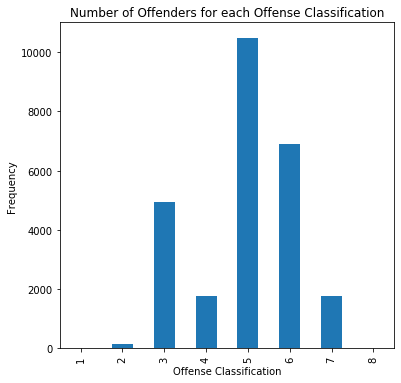

In [79]:
ax = recidivism['Offense Classification'].value_counts().sort_index().plot(kind='bar',
                                    figsize=(6,6),
                                    title="Number of Offenders for each Offense Classification")
ax.set_xlabel("Offense Classification");
ax.set_ylabel("Frequency");

In [80]:
recidivism['Offense Classification'].value_counts(normalize=True)

5    0.403036
6    0.265219
3    0.189470
4    0.068178
7    0.067832
2    0.005957
8    0.000154
1    0.000154
Name: Offense Classification, dtype: float64

In [81]:
recidivism = pd.get_dummies(recidivism, columns=['Offense Classification'], drop_first=True)

**9. Offense Type**

This column describes the general category for the most serious offense for which the offender was placed in prison.
- Other
- Drug
- Property
- Public Order
- Violent

There are no nulls in this column.

In [82]:
print('Number of null values in', recidivism[['Offense Type']].isnull().sum())
print('Data type of', recidivism[['Offense Type']].dtypes)

Number of null values in Offense Type    0
dtype: int64
Data type of Offense Type    object
dtype: object


In [83]:
recidivism['Offense Type'].value_counts()

Drug            7915
Property        7371
Violent         5816
Public Order    3608
Other           1310
Name: Offense Type, dtype: int64

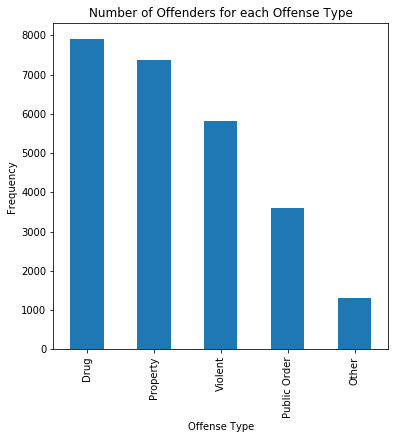

In [84]:
ax = recidivism['Offense Type'].value_counts().plot(kind='bar',
                                    figsize=(6,6),
                                    title="Number of Offenders for each Offense Type")
ax.set_xlabel("Offense Type");
ax.set_ylabel("Frequency");

In [85]:
recidivism = pd.get_dummies(recidivism, columns=['Offense Type'], drop_first=True)

In [86]:
recidivism

,Year Released,Tracking End,Average Release Age,Offense Subtype,Return to Prison,Days to Return,Recidivism Type,New Offense Classification,New Offense Type,New Offense Sub Type,...,Offense Classification_3,Offense Classification_4,Offense Classification_5,Offense Classification_6,Offense Classification_7,Offense Classification_8,Offense Type_Other,Offense Type_Property,Offense Type_Public Order,Offense Type_Violent
0,2010,2013,29.5,Robbery,Yes,433.0,New,C Felony,Drug,Trafficking,...,0,0,0,1,0,0,0,0,0,1
1,2010,2013,29.5,Theft,Yes,453.0,Tech,NaN,NaN,NaN,...,0,0,1,0,0,0,0,1,0,0
2,2010,2013,39.5,Trafficking,Yes,832.0,Tech,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,0,0
3,2010,2013,29.5,Other Criminal,No,NaN,No Recidivism,NaN,NaN,NaN,...,0,0,0,0,1,0,1,0,0,0
4,2010,2013,39.5,Assault,Yes,116.0,Tech,NaN,NaN,NaN,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26015,2015,2018,25.0,Assault,No,NaN,No Recidivism,NaN,NaN,NaN,...,0,0,0,1,0,0,0,0,0,1
26016,2015,2018,39.5,Sex,No,NaN,No Recidivism,NaN,NaN,NaN,...,0,0,0,1,0,0,0,0,0,1
26017,2015,2018,29.5,Traffic,No,NaN,No Recidivism,NaN,NaN,NaN,...,1,0,0,0,0,0,0,0,1,0
26018,2015,2018,29.5,Theft,No,NaN,No Recidivism,NaN,NaN,NaN,...,0,0,1,0,0,0,0,1,0,0


**10. Offense Subtype**

This column gives further classification of the most serious offense for which the offender was placed in prison.

There are no nulls in this column.

In [87]:
print('Number of null values in', recidivism[['Offense Subtype']].isnull().sum())
print('Data type of', recidivism[['Offense Subtype']].dtypes)

Number of null values in Offense Subtype    0
dtype: int64
Data type of Offense Subtype    object
dtype: object


In [88]:
recidivism['Offense Subtype'].value_counts()

Trafficking                        6492
Assault                            3189
Burglary                           2965
Theft                              2680
OWI                                1792
Sex                                1277
Forgery/Fraud                      1209
Other Criminal                     1191
Drug Possession                    1142
Other Violent                       601
Traffic                             524
Murder/Manslaughter                 394
Weapons                             372
Alcohol                             356
Vandalism                           347
Robbery                             338
Other Public Order                  311
Other Drug                          281
Arson                               161
Sex Offender Registry/Residency     131
Flight/Escape                        84
Kidnap                               66
Special Sentence Revocation          63
Prostitution/Pimping                 38
Stolen Property                       9


In [134]:
ax = recidivism['Offense Subtype'].value_counts().sort_index().plot(kind='bar',
                                    figsize=(6,6),
                                    title="Number of Offenders for each Offense Subtype")
ax.set_xlabel("Offense Subtype");
ax.set_ylabel("Frequency");

KeyError: 'Offense Subtype'

In [90]:
recidivism = pd.get_dummies(recidivism, columns=['Offense Subtype'], drop_first=True)

In [91]:
recidivism

,Year Released,Tracking End,Average Release Age,Return to Prison,Days to Return,Recidivism Type,New Offense Classification,New Offense Type,New Offense Sub Type,Target Population,...,Offense Subtype_Robbery,Offense Subtype_Sex,Offense Subtype_Sex Offender Registry/Residency,Offense Subtype_Special Sentence Revocation,Offense Subtype_Stolen Property,Offense Subtype_Theft,Offense Subtype_Traffic,Offense Subtype_Trafficking,Offense Subtype_Vandalism,Offense Subtype_Weapons
0,2010,2013,29.5,Yes,433.0,New,C Felony,Drug,Trafficking,Yes,...,1,0,0,0,0,0,0,0,0,0
1,2010,2013,29.5,Yes,453.0,Tech,NaN,NaN,NaN,No,...,0,0,0,0,0,1,0,0,0,0
2,2010,2013,39.5,Yes,832.0,Tech,NaN,NaN,NaN,Yes,...,0,0,0,0,0,0,0,1,0,0
3,2010,2013,29.5,No,NaN,No Recidivism,NaN,NaN,NaN,Yes,...,0,0,0,0,0,0,0,0,0,0
4,2010,2013,39.5,Yes,116.0,Tech,NaN,NaN,NaN,No,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26015,2015,2018,25.0,No,NaN,No Recidivism,NaN,NaN,NaN,Yes,...,0,0,0,0,0,0,0,0,0,0
26016,2015,2018,39.5,No,NaN,No Recidivism,NaN,NaN,NaN,No,...,0,1,0,0,0,0,0,0,0,0
26017,2015,2018,29.5,No,NaN,No Recidivism,NaN,NaN,NaN,No,...,0,0,0,0,0,0,1,0,0,0
26018,2015,2018,29.5,No,NaN,No Recidivism,NaN,NaN,NaN,Yes,...,0,0,0,0,0,1,0,0,0,0


**11. Return to Prison**

This column states whether or not an offender returned to prison within a 3 year tracking period, where the fields refer to the following: 

- No = Did not return to prison within the three year tracking period
- Yes = Admitted to prison for any reason within the three year tracking period

'Yes' here encompasses both returning to prison for violating terms of parole AND returning to prison for committing a new offense.

This will be useful for visualisations, but is the same as my target variable (just less informative). I will therefore be removing it for modelling.

In [92]:
print('Number of null values in', recidivism[['Return to Prison']].isnull().sum())
print('Data type of', recidivism[['Return to Prison']].dtypes)

Number of null values in Return to Prison    0
dtype: int64
Data type of Return to Prison    object
dtype: object


In [93]:
recidivism['Return to Prison'].value_counts()

No     17339
Yes     8681
Name: Return to Prison, dtype: int64

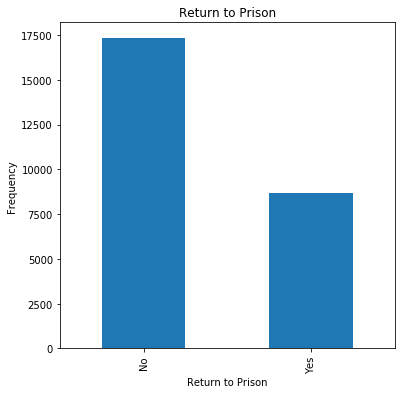

In [94]:
ax = recidivism['Return to Prison'].value_counts().sort_index().plot(kind='bar',
                                    figsize=(6,6),
                                    title="Return to Prison")
ax.set_xlabel("Return to Prison");
ax.set_ylabel("Frequency");

In [95]:
recidivism = pd.get_dummies(recidivism, columns=['Return to Prison'], drop_first=True)

**12. Days to Return**

This column outlines, as a float, the number of days it took before the offender returned to prison. 

There are 17,339 null values here initially, but investigation showed that this was the same number as the number of offenders who didn't return to prison at all within the 3 year tracking period - therefore these nulls were replaced with '1096' for the time being.

I will use this column only for visualisations; it is not an independent feature and will affect my model hugely when kept in as only those who returned to prison have a relevant value in this column.

In [96]:
print('Number of null values in', recidivism[['Days to Return']].isnull().sum())
print('Data type of', recidivism[['Days to Return']].dtypes)

Number of null values in Days to Return    17339
dtype: int64
Data type of Days to Return    float64
dtype: object


In [97]:
recidivism['Recidivism Type'].value_counts()

No Recidivism    17339
New               5516
Tech              3165
Name: Recidivism Type, dtype: int64

This is the same number (17339) so rather than dropping these nulls, we can fill them

In [98]:
recidivism['Days to Return'].max()

1095.0

In [99]:
days = recidivism['Days to Return'].sort_values(ascending=False)
days

23301    1095.0
5544     1095.0
12109    1095.0
3827     1095.0
20808    1095.0
          ...  
26014       NaN
26015       NaN
26016       NaN
26017       NaN
26018       NaN
Name: Days to Return, Length: 26020, dtype: float64

In [100]:
[row for row in recidivism['Days to Return'] if row > 1095]

[]

In [101]:
(recidivism['Days to Return'] > 1095).sum()

0

In [102]:
recidivism['Days to Return'] = recidivism['Days to Return'].fillna(1096)

In [103]:
recidivism['Days to Return'].isnull().sum()

0

**13. Recidivism Type**

This column indicates the reason for return to prison, and will be our target variable when modelled. 

- No Recidivism means that the offended did not return to prison within the 3 year tracking period
- Tech stands for a Parole Technical Violation
- New stands for New Offence (indicating that the individual reoffended)

For this reason, each of the 3 categories will be replaced with the following classifier numbers for the sake of modelling:

- 0 = No Recidivism 
- 1 = Tech
- 2 = New

There are no nulls in this column that need to be dealt with.

In [104]:
print('Number of null values in', recidivism[['Recidivism Type']].isnull().sum())
print('Data type of', recidivism[['Recidivism Type']].dtypes)

Number of null values in Recidivism Type    0
dtype: int64
Data type of Recidivism Type    object
dtype: object


In [105]:
recidivism['Recidivism Type'].value_counts()

No Recidivism    17339
New               5516
Tech              3165
Name: Recidivism Type, dtype: int64

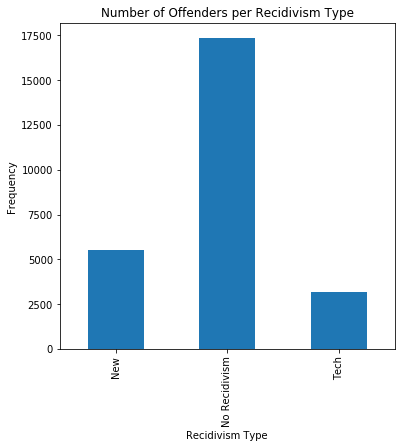

In [106]:
ax = recidivism['Recidivism Type'].value_counts().sort_index().plot(kind='bar',
                                    figsize=(6,6),
                                    title="Number of Offenders per Recidivism Type")
ax.set_xlabel("Recidivism Type");
ax.set_ylabel("Frequency");

In [107]:
recidivism['Recidivism Type'].value_counts(normalize=True)

No Recidivism    0.666372
New              0.211991
Tech             0.121637
Name: Recidivism Type, dtype: float64

In [108]:
print('New Offence Rate', (5516/26020) * 100)

New Offence Rate 21.199077632590317


In [109]:
print('Parole Violation Rate', (3165/26020) * 100)

Parole Violation Rate 12.163720215219062


In [110]:
print('Successful Rehabilitation Rate', (17339/26020)*100)

Successful Rehabilitation Rate 66.63720215219062


In [111]:
recidivism['Recidivism Type'] = recidivism['Recidivism Type'].map({'No Recidivism': 0,
                                                             'Tech': 1, 
                                                                'New':2})

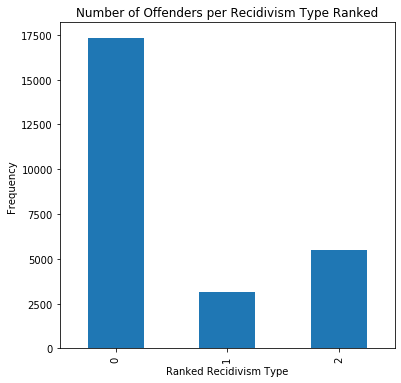

In [112]:
ax = recidivism['Recidivism Type'].value_counts().sort_index().plot(kind='bar',
                                    figsize=(6,6),
                                    title="Number of Offenders per Recidivism Type Ranked")
ax.set_xlabel("Ranked Recidivism Type");
ax.set_ylabel("Frequency");

**14. New Offense Classification**

This column indicates the classification for a new offense committed, if any, where the new conviction maximum penalties are:
A Felony = Life
B Felony = 25 or 50 years
C Felony = 10 years
D Felony = 5 years
Aggravated Misdemeanor = 2 years
Serious Misdemeanor = 1 year
Simple Misdemeanor = 30 days

However, there are 19302 nulls. Initially I wondered if this could be because there are 17339 no recidivism + 3165 technical parole violations, but this sums to 20,504.

This means that 1,202 of the listed values under new offense classification are parole violations (total sum of value counts is 6718, -1202 = 5516 which is the actual number of new offenses)

Drop this column.



In [113]:
print('Number of null values in', recidivism[['New Offense Classification']].isnull().sum())
print('Data type of', recidivism[['New Offense Classification']].dtypes)

Number of null values in New Offense Classification    19302
dtype: int64
Data type of New Offense Classification    object
dtype: object


In [114]:
recidivism.drop('New Offense Classification', axis=1, inplace=True)

**15. New Offense Type**

This column gives the general category for the new conviction while the offender is out of prison.

There are 19302 nulls here; over 70% (and the values that do exist are in places inconsistent with the Recidivism Type column) so I will drop this column.

In [115]:
print('Number of null values in', recidivism[['New Offense Type']].isnull().sum())
print('Data type of', recidivism[['New Offense Type']].dtypes)

Number of null values in New Offense Type    19302
dtype: int64
Data type of New Offense Type    object
dtype: object


In [116]:
recidivism.drop('New Offense Type', axis=1, inplace=True)

**16. New Offense Sub Type**

This column gives further classification of the new conviction. 

There are 19321 nulls here; over 70% null (and the values that do exist are in places inconsistent with the Recidivism Type column) so I will drop this column.

In [117]:
print('Number of null values in', recidivism[['New Offense Sub Type']].isnull().sum())
print('Data type of', recidivism[['New Offense Sub Type']].dtypes)

Number of null values in New Offense Sub Type    19321
dtype: int64
Data type of New Offense Sub Type    object
dtype: object


In [118]:
recidivism.drop('New Offense Sub Type', axis=1, inplace=True)

**17. Target Population**

The Department of Corrections has undertaken specific strategies to reduce recidivism rates for prisoners who are on parole.

I am unclear what this column refers to and I don't need it for modelling- so I will be dropping it.

In [119]:
print('Number of null values in', recidivism[['Target Population']].isnull().sum())
print('Data type of', recidivism[['Target Population']].dtypes)

Number of null values in Target Population    0
dtype: int64
Data type of Target Population    object
dtype: object


In [120]:
recidivism.drop('Target Population', axis=1, inplace=True)

Double check nulls:

In [121]:
recidivism.isnull().sum()

Year Released                  0
Tracking End                   0
Average Release Age            3
Days to Return                 0
Recidivism Type                0
                              ..
Offense Subtype_Traffic        0
Offense Subtype_Trafficking    0
Offense Subtype_Vandalism      0
Offense Subtype_Weapons        0
Return to Prison_Yes           0
Length: 62, dtype: int64

In [122]:
#still 3 nulls here for release age - drop
recidivism.dropna(inplace=True)

In [123]:
recidivism.shape

(26017, 62)

In [124]:
null = [col for col in recidivism.columns if recidivism[col].isnull().any()]

How many nulls (NaNs) are there in each of these columns?

In [125]:
null

[]

For modelling I need to drop the Return to Prison column completely (as this is the same as my target variable, just aggregated) and Days to Return (as this would affect my model too strongly)

In [126]:
recidivism.drop('Return to Prison_Yes', axis=1, inplace=True)
recidivism.drop('Days to Return', axis=1, inplace=True)

In [127]:
recidivism_cleaned = recidivism

In [128]:
recidivism_cleaned

,Year Released,Tracking End,Average Release Age,Recidivism Type,District_2JD,District_3JD,District_4JD,District_5JD,District_6JD,District_7JD,...,Offense Subtype_Robbery,Offense Subtype_Sex,Offense Subtype_Sex Offender Registry/Residency,Offense Subtype_Special Sentence Revocation,Offense Subtype_Stolen Property,Offense Subtype_Theft,Offense Subtype_Traffic,Offense Subtype_Trafficking,Offense Subtype_Vandalism,Offense Subtype_Weapons
0,2010,2013,29.5,2,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
1,2010,2013,29.5,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2010,2013,39.5,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2010,2013,29.5,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2010,2013,39.5,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26015,2015,2018,25.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26016,2015,2018,39.5,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
26017,2015,2018,29.5,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
26018,2015,2018,29.5,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [129]:
recidivism_cleaned.dtypes
pd.set_option('display.max_columns', 81)
recidivism_cleaned

,Year Released,Tracking End,Average Release Age,Recidivism Type,District_2JD,District_3JD,District_4JD,District_5JD,District_6JD,District_7JD,District_8JD,District_ISC,District_Interstate Compact,District_None Given,Release Type_None Given,Release Type_Parole,Release Type_Special Sentence,Ethnicity_Non-Hispanic,Ethnicity_None Given,Race_Asian or Pacific Islander,Race_Black,Race_None Given,Race_White,Sex_Male,Offense Classification_2,Offense Classification_3,Offense Classification_4,Offense Classification_5,Offense Classification_6,Offense Classification_7,Offense Classification_8,Offense Type_Other,Offense Type_Property,Offense Type_Public Order,Offense Type_Violent,Offense Subtype_Animals,Offense Subtype_Arson,Offense Subtype_Assault,Offense Subtype_Burglary,Offense Subtype_Drug Possession,Offense Subtype_Flight/Escape,Offense Subtype_Forgery/Fraud,Offense Subtype_Kidnap,Offense Subtype_Murder/Manslaughter,Offense Subtype_OWI,Offense Subtype_Other Criminal,Offense Subtype_Other Drug,Offense Subtype_Other Public Order,Offense Subtype_Other Violent,Offense Subtype_Prostitution/Pimping,Offense Subtype_Robbery,Offense Subtype_Sex,Offense Subtype_Sex Offender Registry/Residency,Offense Subtype_Special Sentence Revocation,Offense Subtype_Stolen Property,Offense Subtype_Theft,Offense Subtype_Traffic,Offense Subtype_Trafficking,Offense Subtype_Vandalism,Offense Subtype_Weapons
0,2010,2013,29.5,2,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,2010,2013,29.5,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,2010,2013,39.5,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2010,2013,29.5,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2010,2013,39.5,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26015,2015,2018,25.0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26016,2015,2018,39.5,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
26017,2015,2018,29.5,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
26018,2015,2018,29.5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


Cleaned csv file:

In [130]:
recidivism_cleaned.to_csv(r'/Users/darshanasridhar/Documents/Ga Capstone Datasets /Recidivism/recidivism_clean.csv', index=False)

In [131]:
import pandas as pd
df = pd.read_csv('/Users/darshanasridhar/Documents/Ga Capstone Datasets /Recidivism/recidivism_clean.csv')


In [132]:
df

,Year Released,Tracking End,Average Release Age,Recidivism Type,District_2JD,District_3JD,District_4JD,District_5JD,District_6JD,District_7JD,District_8JD,District_ISC,District_Interstate Compact,District_None Given,Release Type_None Given,Release Type_Parole,Release Type_Special Sentence,Ethnicity_Non-Hispanic,Ethnicity_None Given,Race_Asian or Pacific Islander,Race_Black,Race_None Given,Race_White,Sex_Male,Offense Classification_2,Offense Classification_3,Offense Classification_4,Offense Classification_5,Offense Classification_6,Offense Classification_7,Offense Classification_8,Offense Type_Other,Offense Type_Property,Offense Type_Public Order,Offense Type_Violent,Offense Subtype_Animals,Offense Subtype_Arson,Offense Subtype_Assault,Offense Subtype_Burglary,Offense Subtype_Drug Possession,Offense Subtype_Flight/Escape,Offense Subtype_Forgery/Fraud,Offense Subtype_Kidnap,Offense Subtype_Murder/Manslaughter,Offense Subtype_OWI,Offense Subtype_Other Criminal,Offense Subtype_Other Drug,Offense Subtype_Other Public Order,Offense Subtype_Other Violent,Offense Subtype_Prostitution/Pimping,Offense Subtype_Robbery,Offense Subtype_Sex,Offense Subtype_Sex Offender Registry/Residency,Offense Subtype_Special Sentence Revocation,Offense Subtype_Stolen Property,Offense Subtype_Theft,Offense Subtype_Traffic,Offense Subtype_Trafficking,Offense Subtype_Vandalism,Offense Subtype_Weapons
0,2010,2013,29.5,2,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,2010,2013,29.5,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,2010,2013,39.5,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2010,2013,29.5,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2010,2013,39.5,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26012,2015,2018,25.0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26013,2015,2018,39.5,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
26014,2015,2018,29.5,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
26015,2015,2018,29.5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
df.isnull().sum()

In [ ]:
df.dtypes
pd.set_option('display.max_rows', 81)
df.dtypes

In [ ]:
df.corr()

In [ ]:
df.cov

In [ ]:
plt.figure(figsize=(16, 16))
sns.heatmap(df.corr(), annot=True)
plt.show()


### 2. More Visualisations (Tableau)

Links to tableau public notebooks for more visualisations: https://public.tableau.com/profile/darshana.sridhar#!/vizhome/RecidivismEDA/Sheet4

https://public.tableau.com/profile/darshana.sridhar#!/vizhome/RecidivismEDA2/Sheet2?publish=yes

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df_stand = (df - df.mean()) / df.std()
fig, ax = plt.subplots(figsize=(20, 15))
sns.boxplot(data=df_stand , orient='h' , fliersize=5, linewidth=3, saturation=0.5
, ax=ax);


### 3. Risks, Assumptions and Limitations in Cleaning

I made many assumptions here for the sake of modelling, which I have listed again below:

A. Release Type
For the sake of modelling, I have grouped the different release types into 4 general categories:
 1. Parole (including the terms Parole, Parole Granted, Paroled to Detainer - Out of State, Paroled to Detainer - INS, Paroled to Detained - U.S. Marshall, Paroled to Detainer - Iowa, Interstate Compact Parole)
 2. Discharged (including the terms Discharged - End of Sentence, Discharged - Expiration of Sentence, Paroled w/Immediate Discharge)
 3. Special Sentence (Released to Special Sentence, Special Sentence)
 4. None Given
 
 
5. Race - Ethnicity
For the sake of modelling, I split this column into two separate features. 

6. Age At Release
For the sake of modelling, I took the average age of each age bracket input and for 'Under 25' and 'Over 55' I set these to 25 and 55. 

8. Offense Classification
I assumed that the lower the sentence, the less serious the crime and used this to rank offenses. 

I also made the following assumptions to group into 8 distinct categories:
1 (including Simple Misdemeanor, Other Misdemeanor)
2 (including Serious Misdemeanor)
3 (including Aggravated Misdemeanor)
4 (including Felony - Enhancement to Original Penalty, Felony - Enhanced, Other Felony, Other Felony (Old Code), Felony - Mandatory Minumum, Sexual Predator Community Supervision)
5 (including D Felony)
6 (including C Felony, Special Sentence 2005)
7 (including B Felony)
8 (including A Felony)


I dropped the following columns, either because they weren't useful, weren't distinct independent features or because they contained too many nulls (or a combination of these reasons):
1. Return to Prison
2. Days to Return
3. New Offense Classification
4. New Offense Type
5. New Offense Subtype
6. Target Population


### 4. Next steps
My EDA has already & will continue to inform my modeling decisions in a number of ways.

I will be performing classification on multiple classes. I could have used the Return to Prison column as my target variable and performed a simple Yes/No binary classification - however, 'Yes' is an aggregation of both parole violations and new offences and I think these will be more interesting to model separately, and may return more informative results.

Leading on from this, choosing not to use Return to Prison means I needed to drop the this column completely (as this is the same as my target variable, just aggregated) and Days to Return (as this would affect my model too strongly).

Three concrete actions I need to take next:
1. Set up all classification models we have seen
2. Run GridSearch (on top 2 best models to save time)
3. Visualise findings and results 